<a href="https://colab.research.google.com/github/gustavofelicidade/cyberlabs_desafio_tecnico/blob/main/classificador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Plotar instâncias mnist ad hoc
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline



In [8]:
# carregar (baixado se necessário) o conjunto de dados MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

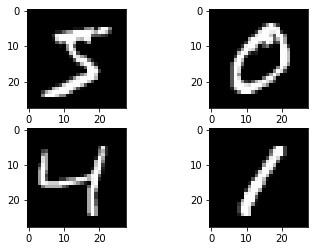

In [14]:
# plotar 4 imagens em escala de cinzaplt.subplot(221)
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# mostra o plot
plt.show()

In [15]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [16]:
# fix random aleatória para reprodutibilidade
seed = 7
numpy.random.seed(seed)

In [17]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [19]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype( 'float32' )
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype( 'float32' )

In [20]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [21]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [35]:
# define baseline model
def baseline_model():
# create model
  model = Sequential()
  model.add(Dense(num_pixels, input_dim = num_pixels, activation= 'relu' ))
  model.add(Dense(num_classes, activation = 'softmax' ))
  # Compile model
  model.compile(loss= 'categorical_crossentropy' , optimizer = 'adam' , metrics=[ 'accuracy' ])
  return model

In [40]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=20, epochs=10, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
3000/3000 - 11s - loss: 0.1815 - accuracy: 0.9451 - val_loss: 0.0890 - val_accuracy: 0.9720
Epoch 2/10
3000/3000 - 10s - loss: 0.0751 - accuracy: 0.9770 - val_loss: 0.0737 - val_accuracy: 0.9758
Epoch 3/10
3000/3000 - 11s - loss: 0.0495 - accuracy: 0.9843 - val_loss: 0.0783 - val_accuracy: 0.9782
Epoch 4/10
3000/3000 - 11s - loss: 0.0375 - accuracy: 0.9883 - val_loss: 0.0750 - val_accuracy: 0.9779
Epoch 5/10
3000/3000 - 10s - loss: 0.0287 - accuracy: 0.9905 - val_loss: 0.0813 - val_accuracy: 0.9789
Epoch 6/10
3000/3000 - 11s - loss: 0.0220 - accuracy: 0.9927 - val_loss: 0.0761 - val_accuracy: 0.9816
Epoch 7/10
3000/3000 - 10s - loss: 0.0190 - accuracy: 0.9934 - val_loss: 0.0876 - val_accuracy: 0.9811
Epoch 8/10
3000/3000 - 10s - loss: 0.0165 - accuracy: 0.9945 - val_loss: 0.1045 - val_accuracy: 0.9789
Epoch 9/10
3000/3000 - 10s - loss: 0.0160 - accuracy: 0.9946 - val_loss: 0.0964 - val_accuracy: 0.9812
Epoch 10/10
3000/3000 - 10s - loss: 0.0148 - accuracy: 0.9954 - val_loss: